## Setup
### Load necessary libraries

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Read the data

In [3]:
data <- read_csv("Viral_Social_Media_Trends.csv")

Rows: 5000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Post_ID, Platform, Hashtag, Content_Type, Region, Engagement_Level
dbl (4): Views, Likes, Shares, Comments

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Looking at the data

In [4]:
head(data)

Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
Post_6,Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129,Low


## Data Cleaning
### Checking for missing data

In [5]:
sum(is.na(data))

[1] 0

### Checking for duplicate

In [6]:
sum(duplicated(data))

[1] 0

### Dropping unnecessary column

In [7]:
data <- data %>% select(-Post_ID, -Engagement_Level)

## Cleaned Dataset Overview

In [8]:
head(data)

Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TikTok,#Challenge,Video,UK,4163464,339431,53135,19346
Instagram,#Education,Shorts,India,4155940,215240,65860,27239
Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223
YouTube,#Education,Shorts,Australia,917951,127125,11687,36806
TikTok,#Dance,Post,Brazil,64866,171361,69581,6376
Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129


## Data Exploration

In [9]:
# Visualize the correlation matrix between numerical variables
numeric_data <- data %>% select(where(is.numeric))
cor_matrix <- cor(numeric_data, use = "complete.obs")
cor_matrix

,Views,Likes,Shares,Comments
Views,1.000000000,-0.003176765,0.01314358,-0.009956131
Likes,-0.003176765,1.000000000,0.01115356,-0.011771810
Shares,0.013143580,0.011153557,1.00000000,-0.000131630
Comments,-0.009956131,-0.011771810,-0.00013163,1.000000000


**Conclusion:** There is no significant linear relationship between the engagement metrics in this dataset.

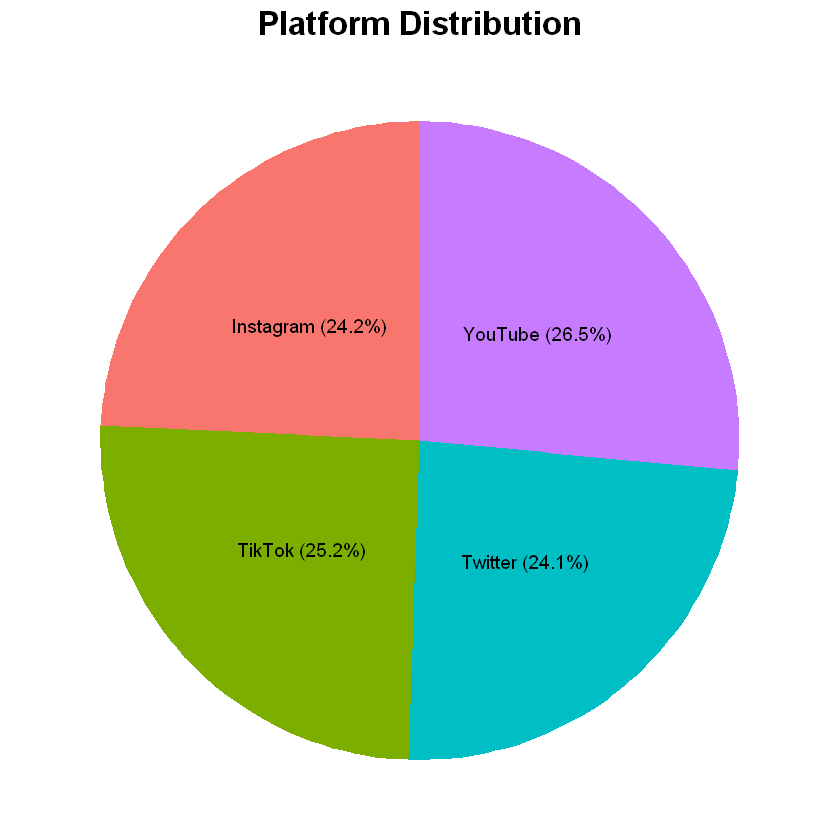

In [10]:
# Visualize platform distribution 
platform_counts <- data %>%
  count(Platform)

platform_counts <- platform_counts %>%
  mutate(percentage = n / sum(n) * 100,
         label = paste0(Platform, " (", round(percentage, 1), "%)"))
         
ggplot(platform_counts, aes(x = "", y = n, fill = Platform)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), size = 4) +
  theme_void() +
  theme(legend.position = "none") +
  ggtitle("Platform Distribution") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20))

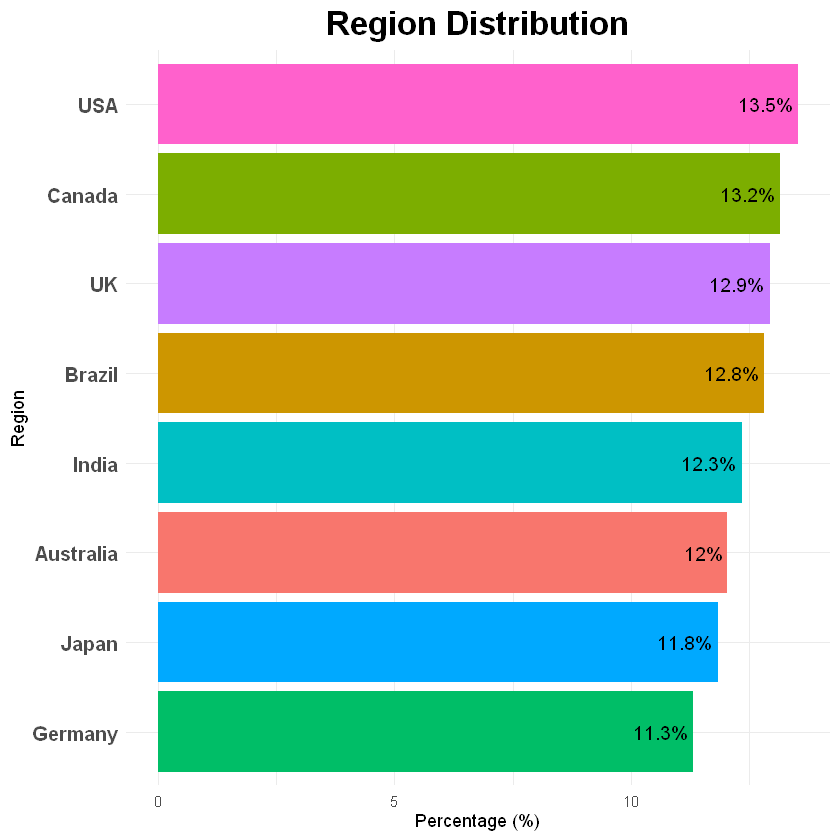

In [11]:
# Visualize region distribution
region_counts <- data %>%
  count(Region) %>%
  mutate(percentage = n / sum(n) * 100,
         label = paste0(Region, " (", round(percentage, 1), "%)"))
  
ggplot(region_counts, aes(x = reorder(Region, percentage), y = percentage, fill = Region)) + 
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), hjust = 1.1, size = 4) +  
  xlab("Region") +
  ylab("Percentage (%)") +
  ggtitle("Region Distribution") +
  coord_flip() +  
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    axis.text.y = element_text(face = "bold", size = 12)
  )

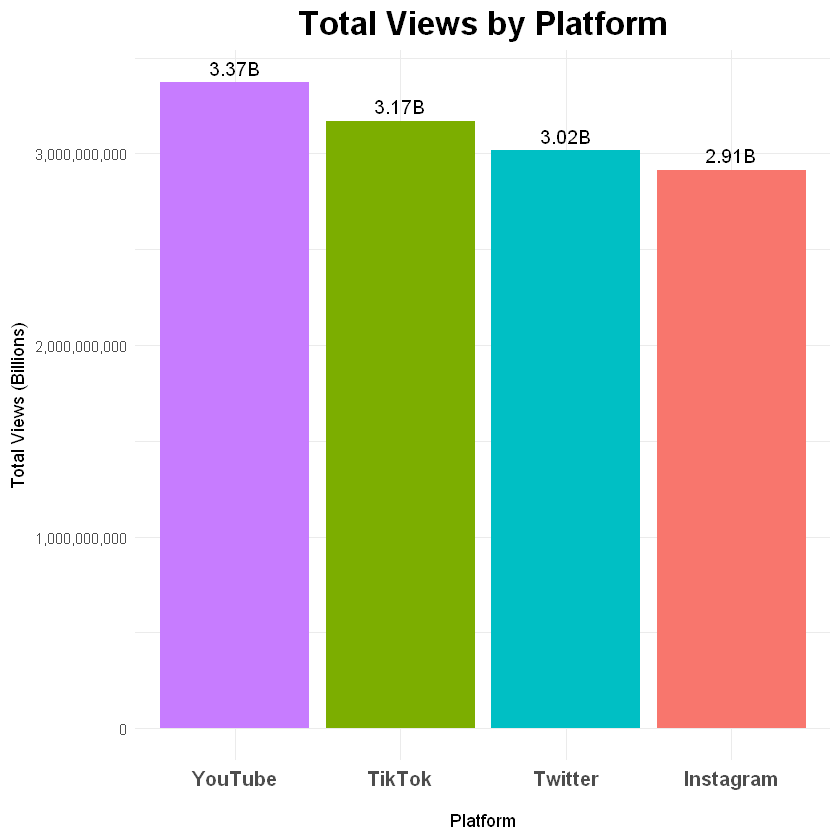

In [12]:
# Visualize total views by platform
platform_views <- data %>%
  group_by(Platform) %>%
  summarise(total_views = sum(Views))

ggplot(platform_views, aes(x = reorder(Platform, -total_views), y = total_views, fill = Platform)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = ifelse(total_views >= 1e9, paste0(round(total_views/1e9, 2), "B"))), vjust = -0.5, size = 4) +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Total Views by Platform",
    x = "Platform",
    y = "Total Views (Billions)"
  ) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
        axis.text.x = element_text(face = "bold", size = 12),
        axis.title.x = element_text(margin = margin(t = 15)))

**Conclusion:** This shows the very tight competition among the big platforms, where YouTube still leads, but its dominance continues to be challenged, especially by TikTok.

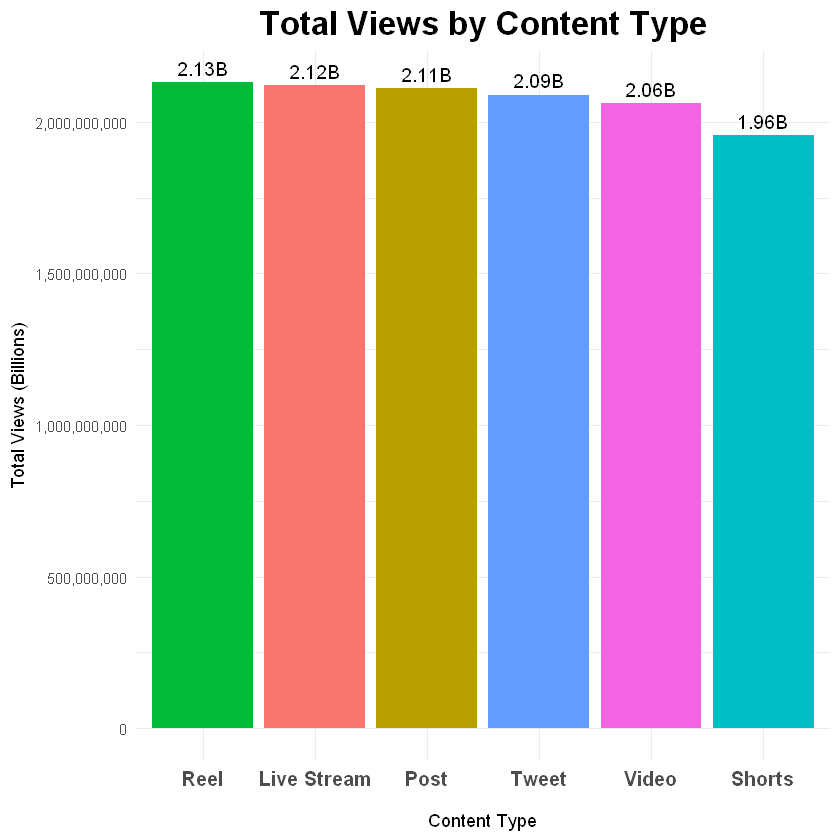

In [13]:
# Visualize total views by content type
content_views <- data %>%
  group_by(Content_Type) %>%
  summarise(total_views = sum(Views))

ggplot(content_views, aes(x = reorder(Content_Type, -total_views), y = total_views, fill = Content_Type)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = ifelse(total_views >= 1e9, paste0(round(total_views/1e9, 2), "B"))), vjust = -0.5, size = 4) +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Total Views by Content Type",
    x = "Content Type",
    y = "Total Views (Billions)"
  ) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
        axis.text.x = element_text(face = "bold", size = 12),
        axis.title.x = element_text(margin = margin(t = 15)))

**Conclusion:** This shows that content designed for quick and easy consumption (Reels) and real-time interactive content (Live Streaming) are both popular with today's audience.

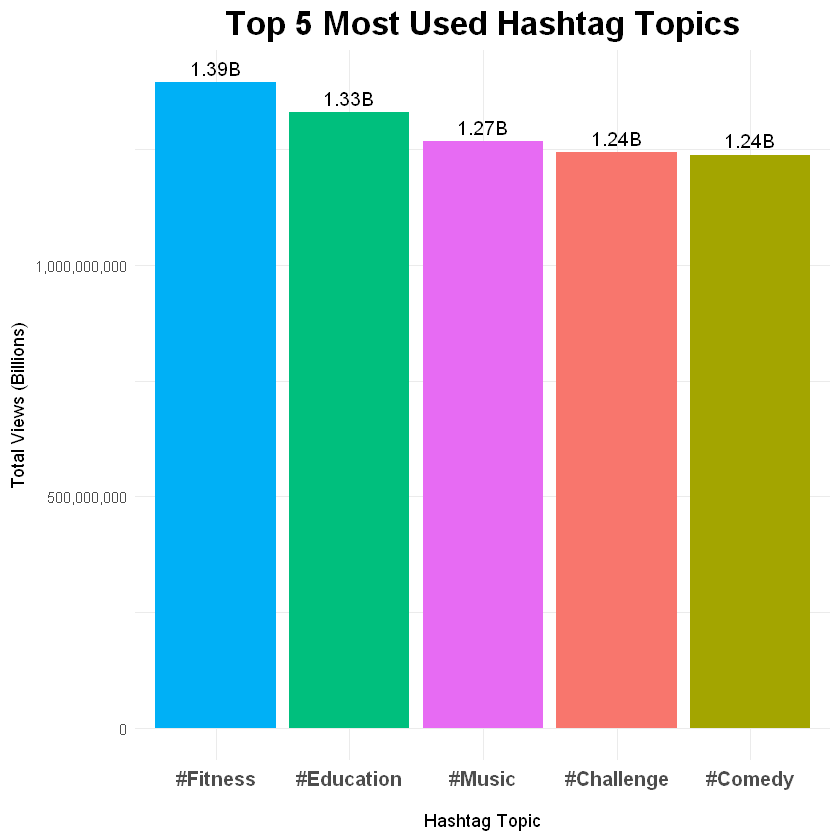

In [14]:
# Visualize top 5 most hashtagged topics
top_topics <- data %>%
  group_by(Hashtag) %>%
  summarise(total_views = sum(Views)) %>%
  arrange(desc(total_views)) %>%
  slice_head(n = 5)

ggplot(top_topics, aes(x = reorder(Hashtag, -total_views), y = total_views, fill = Hashtag)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = ifelse(total_views >= 1e9, paste0(round(total_views/1e9, 2), "B"))), vjust = -0.5, size = 4) +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Top 5 Most Used Hashtag Topics",
    x = "Hashtag Topic",
    y = "Total Views (Billions)"
  ) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
        axis.text.x = element_text(face = "bold", size = 12),
        axis.title.x = element_text(margin = margin(t = 15)))

**Conclusion:** #Fitness and #Education appear to be the most popular hashtag topics.

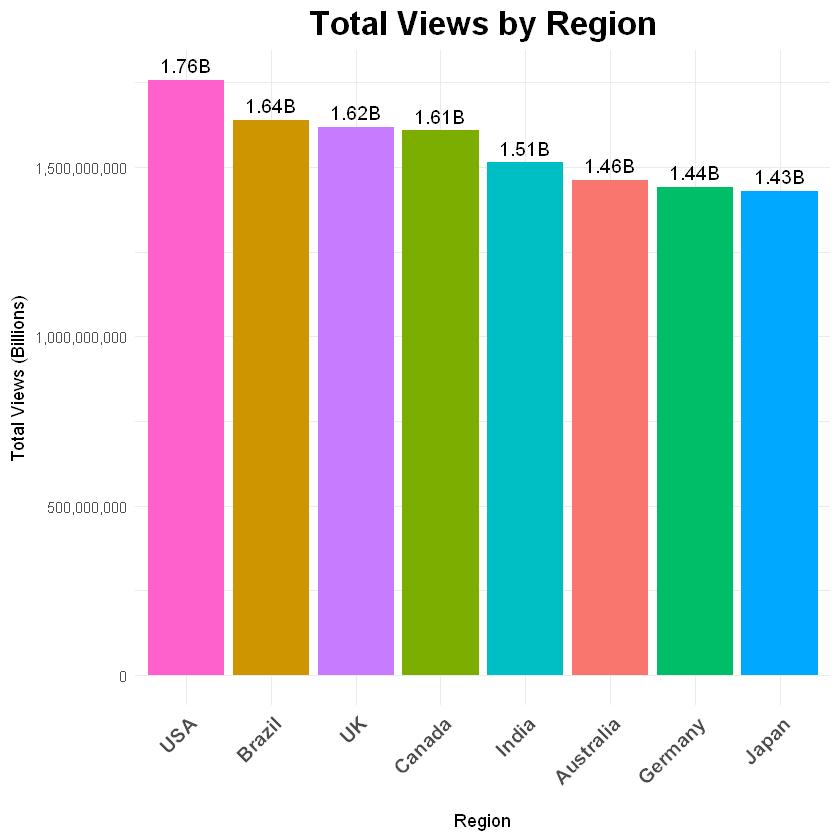

In [16]:
# Visualize views by region
region_views <- data %>%
  group_by(Region) %>%
  summarise(total_views = sum(Views))
ggplot(region_views, aes(x = reorder(Region, -total_views), y = total_views, fill = Region)) +
  geom_bar(stat = "identity") +
    geom_text(aes(label = ifelse(total_views >= 1e9, paste0(round(total_views/1e9, 2), "B"))), vjust = -0.5, size = 4) +
    scale_y_continuous(labels = scales::comma) +
    labs(
      title = "Total Views by Region",
      x = "Region",
      y = "Total Views (Billions)"
    ) +
    theme_minimal() +
    theme(legend.position = "none",
          plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
          axis.text.x = element_text(face = "bold", size = 12, angle = 45, hjust = 1),
          axis.title.x = element_text(margin = margin(t = 15)))

**Conclusion:** Most viewers are from USA and Brazil, although most posts are from USA and Canada but still Brazil have most viewers than Canada.

## Conclusion
These findings suggest that a successful social media strategy should prioritize platform-specific content optimization, with a particular emphasis on short-form video and interactive formats, while considering regional preferences to maximize reach and impact.